# ML Examples: Iris Dataset

| **Title**         | ML Examples |
| --- | --- |
| **Author**        | Alexander Kapitanov                            |
| **Contact**       | sallador@bk.ru                                 |
| **Project lang**  | Python                                         |
| **Packages**      | numpy, scipy, sklearn, seaborn, matplotlib     |
| **License**       | GNU GPL 3.0                                    |


## Ирисы Фишера

Ирисы Фишера - исследуемый набор данных для задачи многоклассовой *классификации* (в частности, задачи кластеризации). Выборка (датасет) содержит 150 экземпляров ириса, по 50 для **трех** видов (`target`):

- Ирис щетинистый (Iris setosa), 
- Ирис виргинский (Iris virginica),
- Ирис разноцветный (Iris versicolor).

В задаче классификации имеется **четыре** признака (`features`) или характеристики, выраженные в виде целого числа в сантиметрах:

- `sepal length` - длина наружной доли околоцветника;
- `sepal width` - ширина наружной доли околоцветника;
- `petal length` - длина внутренней доли околоцветника;
- `petal width` - ширина внутренней доли околоцветника.

С помощью матрицы объекты-признаки, где объектом является отдельно взятый экземпляр цветка, а признак - физические размеры, требуется определить правило классификации, которое разделяет растения по видам.

Отличительная особенность: класс *Iris setosa* линейно разделим относительно двух других классов.


### Список зависимостей:

`requerements.txt`
```
numpy
scipy
pandas
seaborn
sklearn
matplotlib
```

## Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

print('numpy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('seaborn: {}'.format(sns.__version__))

import matplotlib.pyplot as plt
%matplotlib inline

numpy: 1.17.0
pandas: 0.25.3
seaborn: 0.9.0


## Загрузка датасета

Для `sklearn` характерно единообразие атрибутов для большинства наборов данных: они содержат краткое описание датасета `DESCR`, сами данные (объекты и признаки) `data`, метки (вектор правильных ответов) `target`, их название `target_names`, а также название признаков, по которым проводится классификация `feature_names`.

In [2]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Описание

In [3]:
print(iris['DESCR'][:1100])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Метки и признаки

Метки - 3 класса:

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Метки (3 класса) в "цифровой форме":

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

4 вещественных признака:

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### Матрица объекты-признаки

Матрица объекты-признаки имеет размеры 150х4, где 150 - количество объектов классификации, 4 - количество признаков, по которым проводится классификация.

In [8]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [9]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['labels'] = iris['target_names'][iris['target']] # iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Краткая статистика датасета

Метод `describe` позволяет посмотреть математическую статистику набора данных: количество непустых значений, среднее, разброс (среднеквадратичное отклонение), минимальное и максимальное значения, а также квантили (перцентили).

In [10]:
iris_df.describe().iloc[[0, 1, 2, 3, 7], :].round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
max,7.90,4.40,6.90,2.50


## Визуальный анализ

Для каждого признака построим гистограммы распределений и для каждой пары признаков посмотрим на двумерные отображения на плоскость. Как видно, *Iris setosa* линейно разделим относительно двух других классов. Это отчетливо видно по гистограммам признаков *petal length* и *petal width*.

Также следует отметить, что распределения отдаленно похожи на нормальные, с различными параметрами математического ожидания и дисперсии. Выбросов в выборках нет. Кроме того, по признакам *petal length* и *petal width* прослеживается сильная зависимость: **коэффициент корреляции** Пирсона близок к единице - точки на плоскости расположены вдоль одной линии. 

По парам *sepal width* и *sepal length* **очень слабая корреляция** (-0.12), по двум парам *sepal width* и *petal width / petal length* корреляция слабая (-0.37 и -0.43 соответственно). При этом коэффициент корреляции отрицательный (то есть с ростом значения одного признака уменьшается значение другого).

По другим парам признаков точки расположены "тучнее" в виде сгустков областей и несут _меньше_ полезной информации с точки зрения многоклассовой классификации. Если бы в этой задаче стоял вопрос разделения цветков только по двум признакам *sepal length* и *sepal width*, то качество классификации было бы существенно хуже, т.к. получить точное разделение по областям - невозможно, либо модель будет **переобучена** и на новых данных даст ложные результаты. 

In [11]:
iris_df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


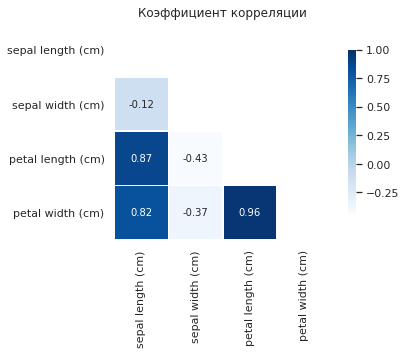

In [12]:
# Prepare mask for upper diag
df_corr = iris_df.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    sns.heatmap(
        data=df_corr, 
        mask=mask, 
        cmap='Blues', 
        square=True, 
        annot=True, 
        linewidths=0.75, 
        cbar_kws={"shrink": 0.75}
    )
    ax.set_title("Коэффициент корреляции")

Text(0.5, 1.01, 'Гистограммы распределений: Классификация')

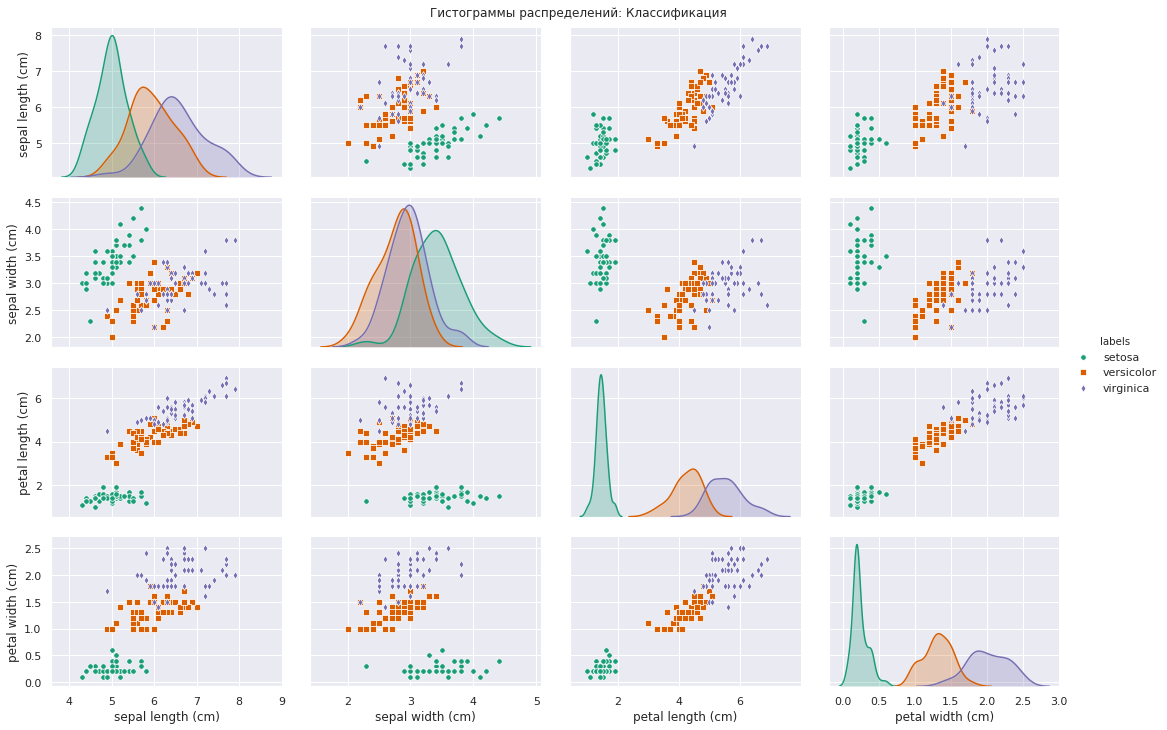

In [13]:
f = sns.pairplot(
    data=iris_df, 
    diag_kind='kde',
    hue='labels', 
    markers=['o', 's', 'd'],
    plot_kws={'s': 30},
    palette='Dark2',
    height=2.5, 
    aspect=1.5
)
f.fig.suptitle("Гистограммы распределений: Классификация", y=1.01)

# def hide_current_axis(*args, **kwds):
#     plt.gca().set_visible(False)

# f.map_upper(hide_current_axis)

### Визуализация без меток

Представим, что информация о метках отсутствует. То есть информация о количестве классов и их распределении по признакам недоступна: неизвестно сколько у нас различных цветков (число *классов*). Также неизвестно, как эти классы могли быть распределены по признакам. Иными словами, задача **классификации** превращается в задачу **кластеризации** (позже мы ещё вернемся к этому). Посмотрим, как выглядят распределения и отображения на плоскость по парам признаков в этом случае.

Text(0.5, 1.01, 'Гистограммы без меток: Кластеризация')

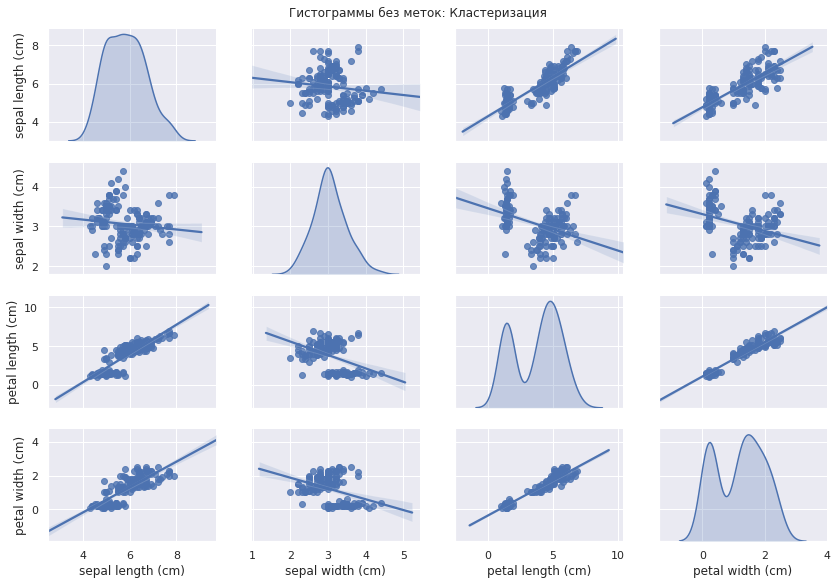

In [14]:
f = sns.pairplot(
    data=iris_df.drop(['labels'], axis=1), 
    diag_kind='kde',
    kind='reg',
    palette='Dark2',
    height=2.0, 
    aspect=1.5
)
f.fig.suptitle("Гистограммы без меток: Кластеризация", y=1.01)

Как видно из распределений без меток (вектора ответов) мы имеем как минимум два класса. Также видна сильная корреляция по признакам *petal length* и *petal width*. В то же время, из пары признаков *sepal length* и *sepal width* можно извлечь немного информации, т.к. данные сгруппированы в трудно разделимой области.

### Визуализация по паре `sepal`

In [15]:
iris_df[['sepal length (cm)', 'sepal width (cm)']].corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


#### Кластеризация (без меток)

Text(0.5, 1.02, 'Пара признаков sepal')

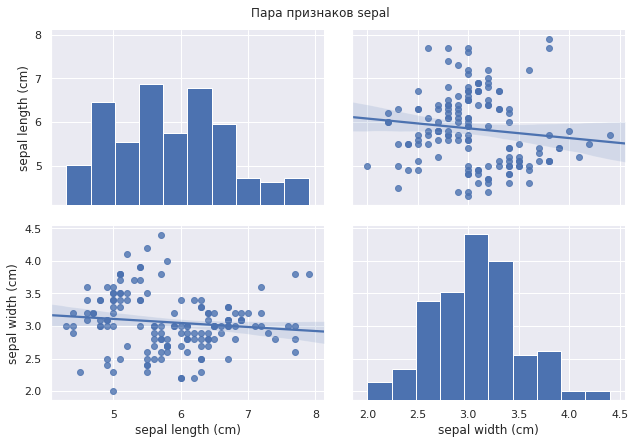

In [16]:
f = sns.pairplot(
    data=iris_df[['sepal length (cm)', 'sepal width (cm)']], 
    diag_kind='hist',
    kind="reg",
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков sepal", y=1.02)

#### Классификация (с метками)

Text(0.5, 1.02, 'Пара признаков sepal')

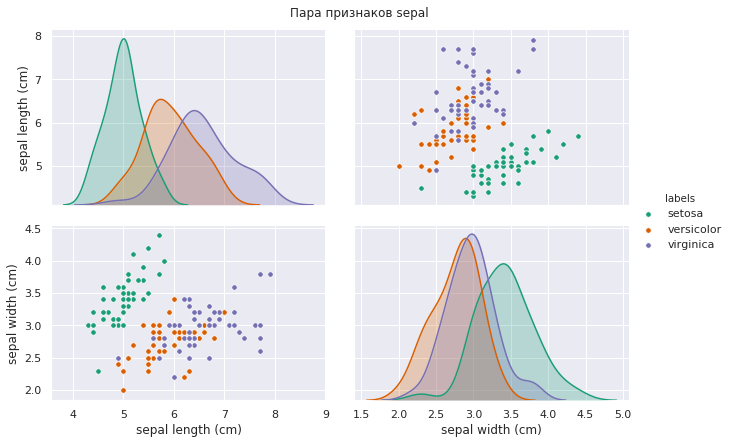

In [17]:
f = sns.pairplot(
    data=iris_df, 
    vars=iris_df.columns.values[:2],
    diag_kind='kde',
    hue='labels', 
    #markers=['o', 's', 'd'],
    plot_kws={'s': 30},
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков sepal", y=1.02)

### Визуализация по паре `petal`

In [18]:
iris_df[['petal length (cm)', 'petal width (cm)']].corr(method='pearson')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


#### Кластеризация (без меток)

Text(0.5, 1.02, 'Пара признаков petal')

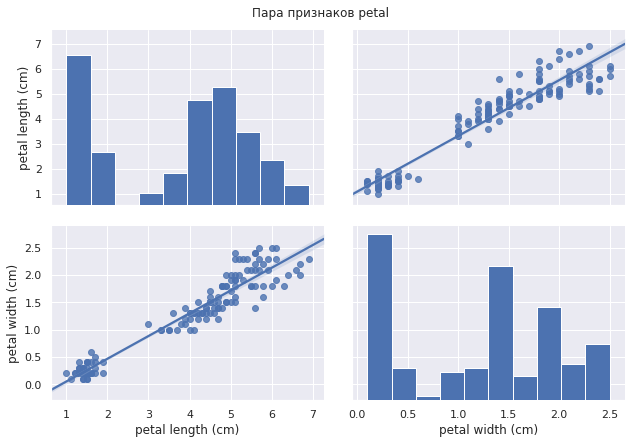

In [19]:
f = sns.pairplot(
    data=iris_df[['petal length (cm)', 'petal width (cm)']], 
    diag_kind='hist',
    kind="reg",
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков petal", y=1.02)

#### Классификация (с метками)

Text(0.5, 1.02, 'Пара признаков petal')

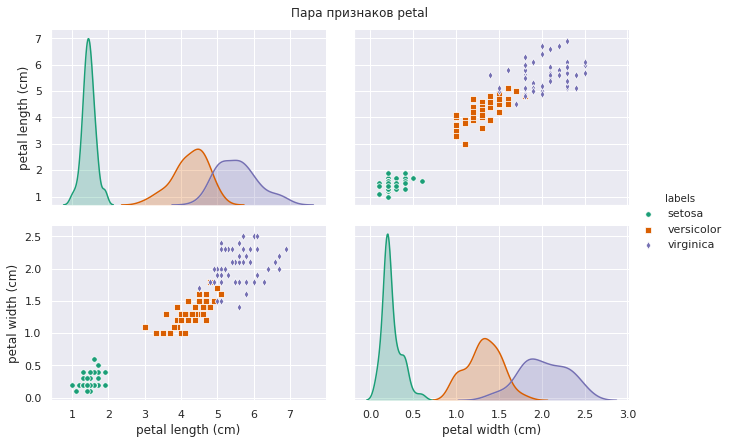

In [20]:
f = sns.pairplot(
    data=iris_df, 
    vars=iris_df.columns.values[2:4],
    diag_kind='kde',
    hue='labels', 
    markers=['o', 's', 'd'],
    plot_kws={'s': 30},
    palette='Dark2',
    height=3.0, 
    aspect=1.5
)
f.fig.suptitle("Пара признаков petal", y=1.02)

### Визуализация по признакам

Посмотрим, как выглядят распределения по отдельно взятым признакам. Такие графики удобны для предварительного анализа. С их помощью также можно понять разделимость классов по каким-либо признакам, найти зависимости и предварительно оценить различные параметры. 

На первом графике представлены распределения `violin plots`. С помощью этих распределений по "хвостам" и толщине лепестка можно прикинуть разброс (среднеквадратическое отклонение) и найти среднее значение. 

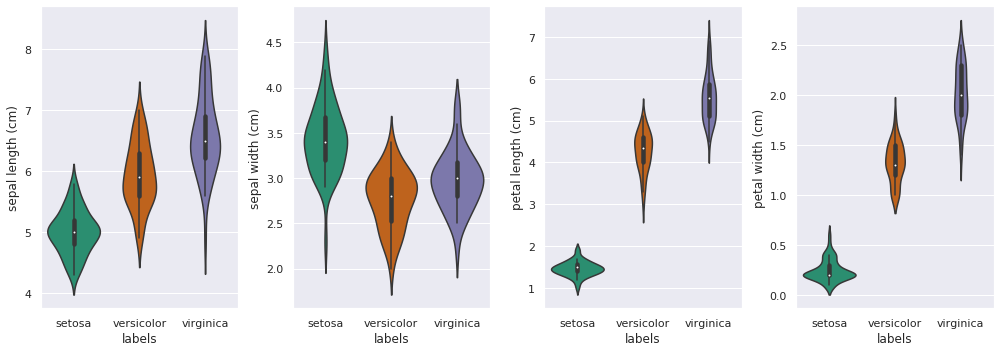

In [21]:
plt.figure(num='Iris Dataset: violin plots', figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, 1+i)
    sns.violinplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        palette='Dark2'
    )
plt.tight_layout()

### Математическое ожидание и дисперсия

In [22]:
iris_df.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


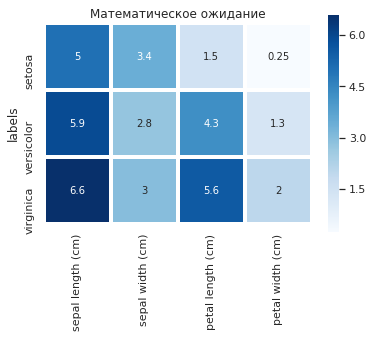

In [23]:
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    sns.heatmap(
        data=iris_df.groupby('labels').mean(), 
        cmap='Blues', 
        square=True, 
        annot=True, 
        linewidths=3.0, 
    )
    ax.set_title("Математическое ожидание")

Как видно, по признакам *petal length (cm)* и *petal width (cm)* математическое ожидание для **Iris Setosa** существенно отличается от двух других классов.

In [24]:
iris_df.groupby('labels').var()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


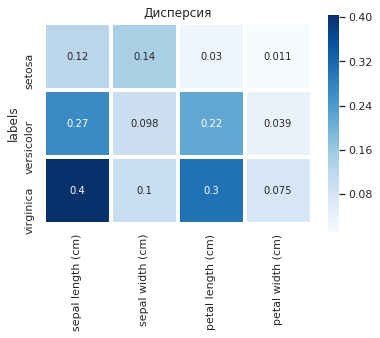

In [25]:
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    sns.heatmap(
        data=iris_df.groupby('labels').var(), 
        cmap='Blues', 
        square=True, 
        annot=True, 
        linewidths=3.0, 
    )
    ax.set_title("Дисперсия")

### Диаграммы размаха

Также полезно визуализировать данные с помощью так называемых диаграмм размаха `boxplot` в совокупности с графиками типа `swarmplot`, на которых компактно отражено одномерное распределение вероятностей. С помощью этого графика удобно отслеживать *медиану*, а также нижний и верхний квартили, минимальное и максимальное значение выборки, а самое главное - **выбросы**. Преимущество диаграмм размаха перед гистограммами заключается в том, что  диаграммы занимают меньше места и и удобны для сравнения распределений между несколькими группами данных.

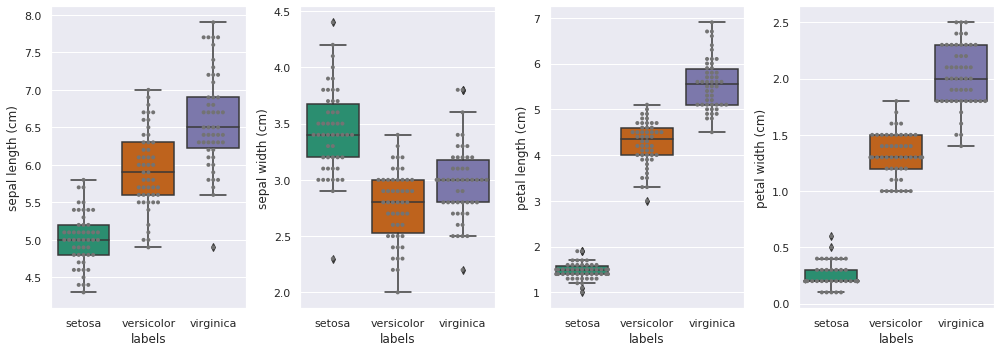

In [26]:
plt.figure(num='Iris Dataset: violin plots', figsize=(14, 5))
for i in range(4):
    plt.subplot(1, 4, 1+i)
    ax = sns.boxplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        palette='Dark2'
    )
    ax = sns.swarmplot(
        x='labels', 
        y=iris_df.columns[i], 
        data=iris_df,
        color='0.45',
        size=4,
        # palette='Dark2'
    )
plt.tight_layout()

## Классификация

Решим задачу обучения с учителем - классификацию по размеченным данным. Для этого воспользуемся простейшими классическими алгоритмами, предоставляемыми *scikit-learn* 
- метод ближайших соседей (kNN), 
- метод опорных векторов (support vector machine), 
- логистическая регрессия (logistic regression), 
- решающие деревья (decision trees).

Зададим метрики проверки классификаторов - **аккуратность** (accuracy) и **матрица ошибок** (confusion matrix), с помощью которой можно найти precision (точность), recall (полнота), f1-score (средне-гармоническое точности и полносты).

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Предварительно разобъем выборку на две части: обучающая и проверочная (валидационная) часть.

In [28]:
X, y = iris['data'], iris['target']

# Train / test split
random_state = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
X_train.shape, X_test.shape

((100, 4), (50, 4))

Классификаторы с параметрами по умолчанию:
- SVC,
- kNN Classifier,
- Log. regression,
- DT Classifier

In [29]:
# SVC
clf_svc = SVC(C=1, kernel='rbf', gamma='auto', random_state=random_state)
# KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
# LogisticRegression
clf_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=random_state, n_jobs=4)
# DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='gini', random_state=random_state)
# RandomForestClassifier
#clf_rfc = RandomForestClassifier(n_estimators=10, random_state=random_state)

Обучение классификаторов

In [30]:
clf_svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=8, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
clf_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=8,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [33]:
clf_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8, splitter='best')

### Accuracy метрика для классификаторов

In [34]:
# Predictions
list_a = ['SVC', 'kNN', 'LogReg', 'DTrees']

y_pred = [clf_svc.predict(X_test), 
          clf_knn.predict(X_test),
          clf_log.predict(X_test),
          clf_dtc.predict(X_test),
          #clf_rfc.predict(X_test),
         ]

for i, el in enumerate(zip(y_pred, list_a)):
    print(f'The accuracy of the {el[1]} is: {accuracy_score(y_test, el[0])}')

The accuracy of the SVC is: 0.94
The accuracy of the kNN is: 0.96
The accuracy of the LogReg is: 0.94
The accuracy of the DTrees is: 0.92


### Матрица ошибок классификаторов

In [35]:
for i, el in enumerate(zip(y_pred, list_a)):
    print(f'Confusion matrix for {el[1]}:\n\n{confusion_matrix(y_test, el[0])}\n')

Confusion matrix for SVC:

[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]

Confusion matrix for kNN:

[[18  0  0]
 [ 0 16  0]
 [ 0  2 14]]

Confusion matrix for LogReg:

[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]

Confusion matrix for DTrees:

[[18  0  0]
 [ 0 15  1]
 [ 0  3 13]]



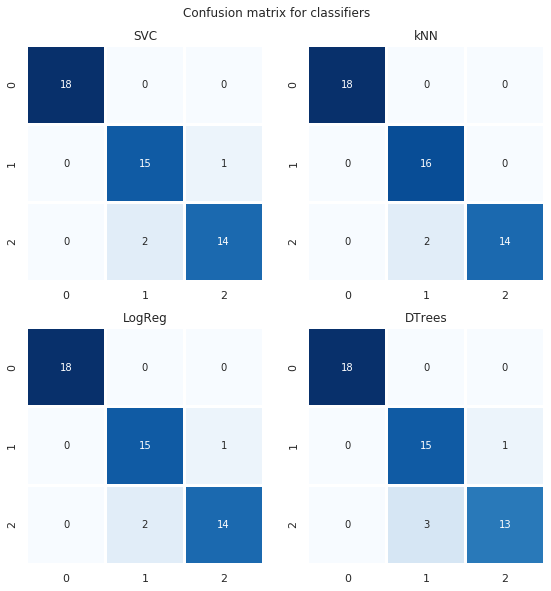

In [36]:
plt.figure('Confusion matrix', figsize=(8, 8))
plt.suptitle('Confusion matrix for classifiers', y=1.02)
for i, el in enumerate(zip(y_pred, list_a)):
    plt.subplot(2, 2, 1+i)
    plt.title(f'{el[1]}')
    sns.heatmap(
        data=confusion_matrix(y_test, el[0]), 
        cmap='Blues',
        cbar=False,
        square=True, 
        annot=True, 
        linewidths=2.0, 
    )
plt.tight_layout()

### Подбор параметра k для метода ближайших соседей

Посмотрим, как меняется метрика accuracy для метода ближайших соседей при варьировании числа **k**

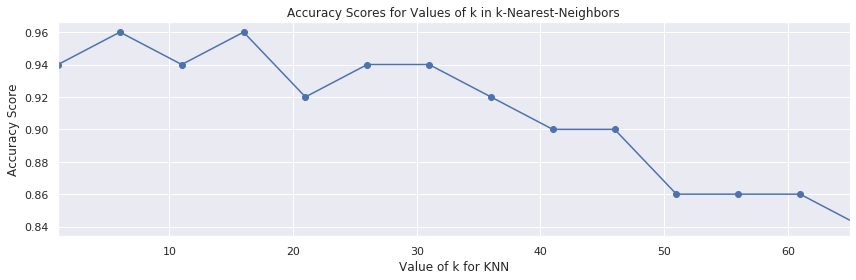

In [37]:
k_range = range(1, 70, 5)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.figure('Find k in KNN', figsize=(12, 4))
plt.plot(k_range, scores, '-o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k in k-Nearest-Neighbors')
plt.grid(True)
plt.xlim([1, 65])
plt.tight_layout()

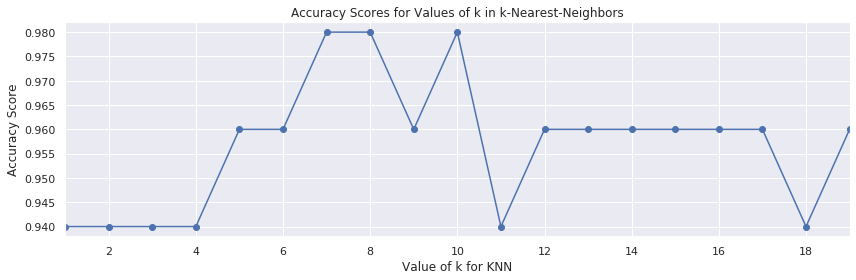

In [38]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.figure('Find k in KNN', figsize=(12, 4))
plt.plot(k_range, scores, '-o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k in k-Nearest-Neighbors')
plt.grid(True)
plt.xlim([1, 19])
plt.tight_layout()

### Кроссвалидация

In [39]:
cv_scores = []

# Change number of folds for Cross Validation scheme
for n in k_range:
    knn = KNeighborsClassifier(n_neighbors = n, algorithm = 'brute')
    cross_val = cross_val_score(knn, X, y, cv = 3, scoring = 'accuracy')
    cv_scores.append(cross_val.mean())

optimal_n = np.argmax(cv_scores)+1

knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n, algorithm = 'brute')
knn_optimal.fit(X_train, y_train)

y_pred = knn_optimal.predict(X_test)
res_acc = accuracy_score(y_test, y_pred)*100
print("The accuracy is {1} for optimal k = {0}".format(optimal_n, res_acc))

The accuracy is 94.0 for optimal k = 4


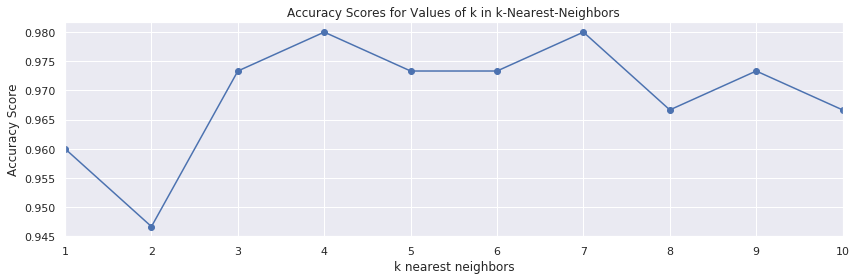

In [40]:
plt.figure('Find k in KNN', figsize=(12, 4))
plt.plot(k_range, cv_scores, '-o')
plt.xlabel('k nearest neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k in k-Nearest-Neighbors')
plt.grid(True)
plt.xlim([1, 10])
plt.tight_layout()

###  Классификатор "Один против всех"

Проведем обучение классификатора "Один против всех". Дополнительно бинаризуем метки, а также добавим шумовые данные для усложения задачи классификации.

Построим ROC-кривую и найдем площадь под кривой.

In [41]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Make dataset again
X, y = iris['data'], iris['target']

# Binarize the output
y_bin = label_binarize(y, classes=range(len(iris['target_names'])))
n_classes = y_bin.shape[1]

# Add noisy features to make the problem harder
n_samples, n_features = X.shape

random_state = np.random.RandomState(42)
X_new = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train & test split
X_train, X_test, y_train, y_test = train_test_split(X_new, 
                                                    y_bin, 
                                                    test_size=0.7,
                                                    random_state=random_state
                                                   )

In [42]:
# One-vs-Rest
classifier = OneVsRestClassifier(SVC(kernel='linear', 
                                     probability=True,
                                     random_state=random_state
                                    ))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

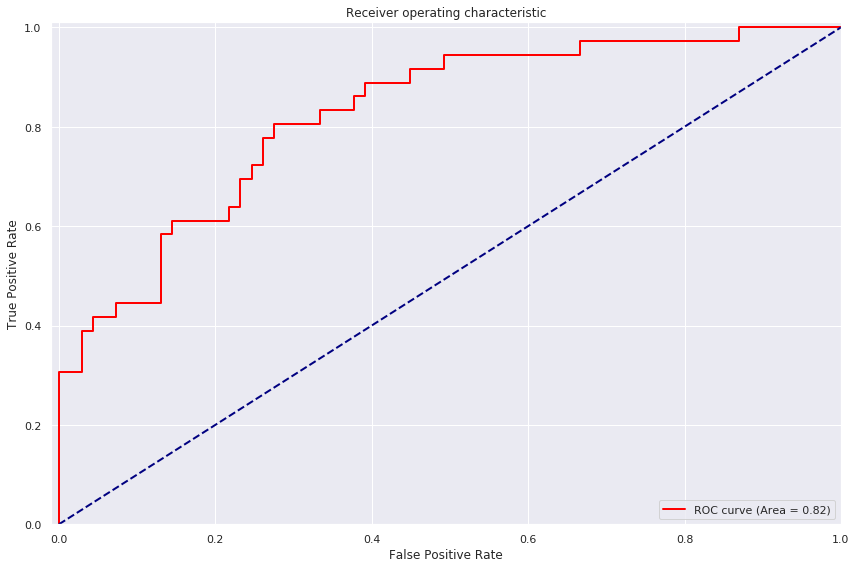

In [43]:
plt.figure('ROC AUC', figsize=(12, 8))
plt.plot(fpr[2], tpr[2], color='red', lw=2, label='ROC curve (Area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.tight_layout()

### ROC AUC для мультиклассовой задачи

Посмотрим, как ведет себя ROC-кривая в задачах, где число классов больше 2. Исходный датасет удовлетворяет этому требованию.

In [44]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

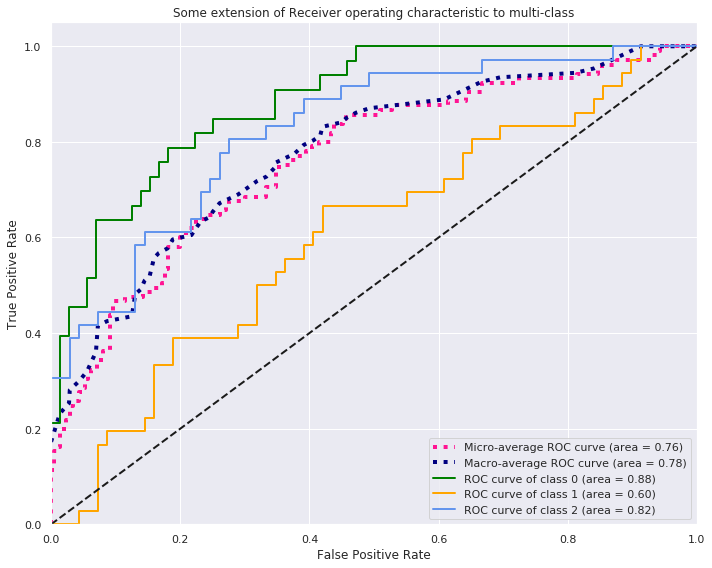

In [45]:
from itertools import cycle

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', lw=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', lw=4)

colors = cycle(['green', 'orange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.tight_layout()

## Кластеризация

В задачах обучения без учителя метки (вектор ответов) отсутствуют. Попытаемся предсказать количество классов путём кластеризации данных. Для этого можно использовать хорошо изученный механизм - **k-means**.

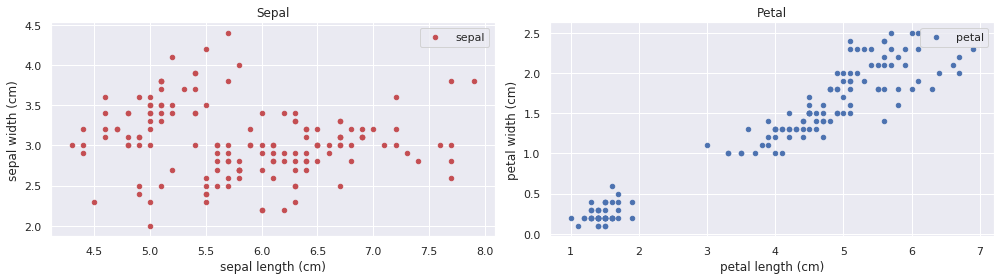

In [46]:
#plt.figure(num='Iris Dataset: Sepal & Petal')
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
iris_df.plot(x=iris_df.columns[0],
             y=iris_df.columns[1],
             kind="scatter",
             ax=ax[0],
             sharex=False,
             sharey=False,
             label="sepal",
             color='r'
            )

iris_df.plot(x=iris_df.columns[2],
             y=iris_df.columns[3],
             kind="scatter",
             ax=ax[1],
             sharex=False,
             sharey=False,
             label="petal",
             color='b'
            )

ax[0].set(title='Sepal')
ax[1].set(title='Petal')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

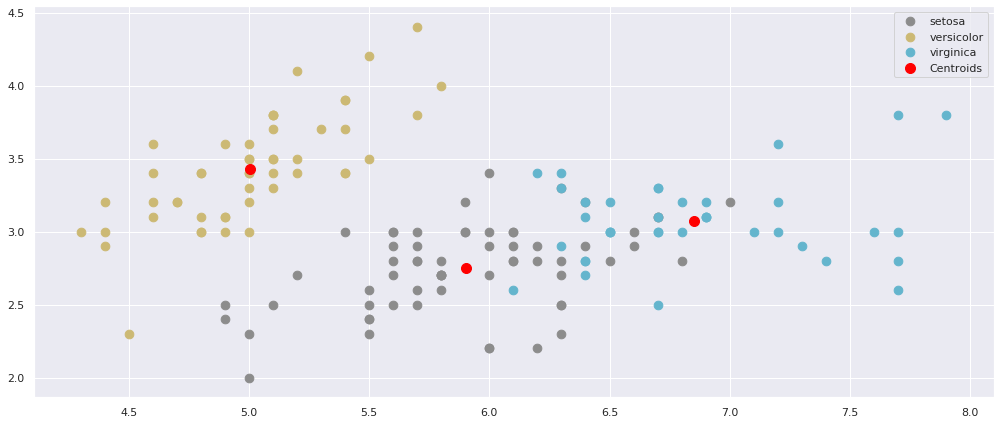

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = random_state
               )

y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure('K-means predict', figsize=(14, 6))
for i in range(3):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], s=75, c='C'+str(i+7), label=iris['target_names'][i])
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
plt.legend()
plt.tight_layout()